# BTS 자료분석
> Best Trip Service
> (원자료) 국민여행조사_국내여행

- 이전 원자료 수정 작업
- 결측치가 많은정보 제거 (2일차 이후의 여행정보 제거)
- 해석하기 어려운 데이터 제거 (여행자의 올해 여행 정보)
- 불필요한 데이터 제거 (여행을 가지 않은 이유)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

In [3]:
data = pd.read_csv('(원자료) 2020년 국민여행조사_국내여행.csv',index_col='ID')


In [4]:
d11 = data['A11'] > 4
d12 = data['A12'] > 4
d13 = data['A13'] > 4

data['total'] = d11 + d12 +d13
data['total'] = data['total'].map({True:1,False:0})

data.drop(['A11'], axis=1, inplace= True)
data.drop(['A12'], axis=1, inplace= True)
data.drop(['A13'], axis=1, inplace= True)
data.drop(['BARA'],axis=1, inplace= True)

data.drop(['WT_DOM'],axis=1, inplace=True)
data.drop(['BJOB'],axis=1, inplace= True)
data.drop(['BINC1'],axis=1, inplace= True)
data.drop(['BMON'],axis=1, inplace= True)
data.drop(['BMAR'],axis=1, inplace= True)

In [5]:
data = data[data['D_TRA1_CHECK']=='Y']
data = data[data['D_TRA1_CASE']==1]

In [6]:
spot = data['D_TRA1_1_SPOT']

In [7]:
data['D_TRA1_1_SPOT'] = data['D_TRA1_1_SPOT'].apply(int)

In [8]:
data.groupby(['D_TRA1_1_SPOT']).mean().sort_values(["D_TRA1_ONE_COST"], ascending=True).head(30).index

Int64Index([23080, 11090, 37370, 31160, 31170, 11130, 31040, 11100, 37100,
            11120, 37390, 38320, 29010, 31110, 22310, 22050, 11080, 33390,
            21120, 31120, 25050, 33330, 37070, 31100, 34310, 33370, 31260,
            31080, 31020, 31030],
           dtype='int64', name='D_TRA1_1_SPOT')

In [9]:
man = [32030, 37020, 39020, 31370, 34030, 32060, 39010, 36020, 37010,
            21090, 34380, 32010, 38090, 38050, 38350, 31380, 35380, 35020,
            36310, 35010, 34020, 38080, 33380, 35330, 31200, 23310, 23010,
            21140, 34370, 38100]
woman = [39020, 37020, 32030, 39010, 32060, 21090, 31370, 34030, 31380,
            35010, 37010, 34380, 36020, 38350, 32010, 38050, 38090, 36310,
            23310, 31270, 35020, 31200, 35380, 33380, 34020, 38100, 35330,
            38080, 31240, 32410]
single = [39020, 31010, 32030, 21090, 36020, 37010, 39010, 34080, 35380,
            32060, 38050, 38080, 22020, 31240, 34020, 31090, 38100, 37020,
            36390, 31370, 36350, 26310, 25050, 36470, 21050, 34370, 21010,
            34030, 31220, 34360]
multi = [39020, 37020, 32030, 39010, 31370, 32060, 34030, 21090, 37010,
            36020, 34380, 32010, 31380, 38090, 38350, 35010, 38050, 36310,
            35020, 35380, 23310, 34020, 33380, 31200, 35330, 38080, 31270,
            23010, 38100, 31240]
poor = [23080, 11090, 37370, 31160, 31170, 11130, 31040, 11100, 37100,
            11120, 37390, 38320, 29010, 31110, 22310, 22050, 11080, 33390,
            21120, 31120, 25050, 33330, 37070, 31100, 34310, 33370, 31260,
            31080, 31020, 31030]
rich = [39010, 39020, 37430, 21060, 22040, 11180, 21130, 32060, 32340,
            32410, 11250, 32350, 32400, 32030, 21090, 36020, 21020, 32390,
            32330, 32070, 38090, 38050, 32310, 36470, 11240, 32040, 34380,
            22020, 37420, 35340]
family = [23080, 11120, 25010, 37370, 11030, 37100, 31170, 21120, 33350,
            25050, 37390, 31160, 38320, 34070, 29010, 11220, 31110, 22050,
            31120, 11080, 31070, 31040, 34310, 31100, 38330, 34020, 37050,
            22020, 31220, 31010]
friend = [37370, 11170, 11090, 31040, 36430, 31170, 37080, 11130, 31160,
            33390, 31080, 11210, 11100, 37100, 37320, 22310, 23080, 11120,
            38320, 31260, 37390, 37070, 29010, 31140, 26310, 11080, 31110,
            31030, 31050, 25010]

# 결측치 처리

In [10]:
all_na = (data.isnull().sum() / len(data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_na})

Text(0.5, 1.0, 'Percent missing data by feature')

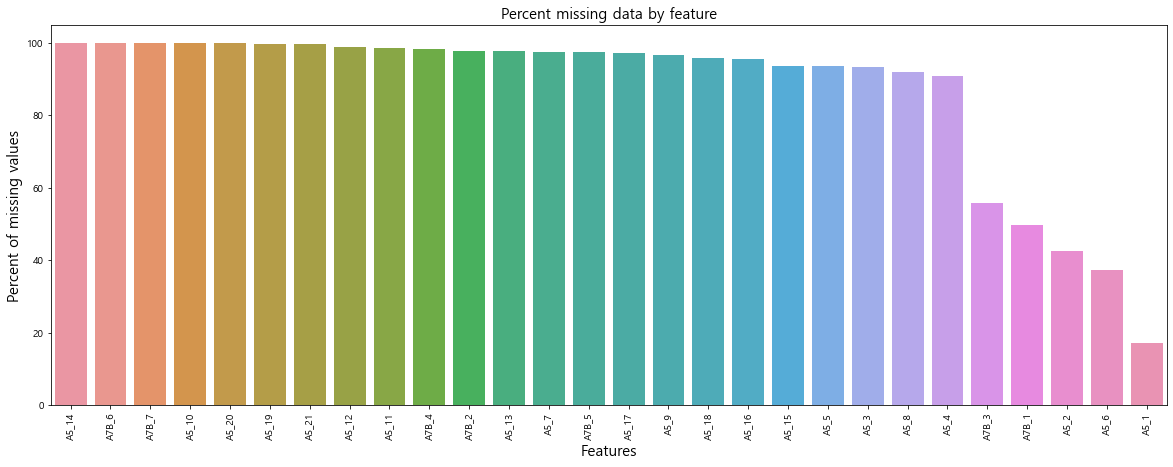

In [11]:
f, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [12]:
# 여행활동 이진 변수로 변경
for i in range(21):
    data['A5_{}'.format(i+1)] = data['A5_{}'.format(i+1)].fillna(0)
    data['A5_{}'.format(i+1)] = data['A5_{}'.format(i+1)].map({i+1:1,0:0})
# 여행 동반자 유형
for i in range(7):
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].fillna(0)
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].map({i+1:1,0:0})

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10638 entries, 11080760641_204453 to 3902057133A_260717
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   D_TRA1_CHECK     10638 non-null  object 
 1   D_TRA1_CASE      10638 non-null  float64
 2   D_TRA1_SMONTH    10638 non-null  float64
 3   D_TRA1_SDAY      10638 non-null  float64
 4   D_TRA1_EMONTH    10638 non-null  float64
 5   D_TRA1_EDAY      10638 non-null  float64
 6   D_TRA1_S_Day     10638 non-null  float64
 7   D_TRA1_COST      10638 non-null  float64
 8   D_TRA1_NUM       10638 non-null  float64
 9   D_TRA1_ONE_COST  10638 non-null  float64
 10  D_TRA1_1_SPOT    10638 non-null  int64  
 11  A1_1             10638 non-null  int64  
 12  A4_1             10638 non-null  int64  
 13  A5_1             10638 non-null  int64  
 14  A5_2             10638 non-null  int64  
 15  A5_3             10638 non-null  int64  
 16  A5_4             10638 non-null  

In [14]:
data

,D_TRA1_CHECK,D_TRA1_CASE,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,...,A7B_6,A7B_7,A9,NA9,BSEX,BAGE,SAGE,BEDU,BFAM,total
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,Y,1.0,8.0,9.0,8.0,9.0,0.0,40000.0,1.0,40000.0,...,0,0,77000,39500,1,4,45,3,3,0
21110610901_148196,Y,1.0,6.0,22.0,6.0,23.0,1.0,90000.0,1.0,90000.0,...,0,0,249997,78571,1,2,25,4,1,0
2231011065A_7203,Y,1.0,1.0,17.0,1.0,17.0,0.0,90000.0,3.0,30000.0,...,0,0,90003,30001,2,5,53,3,3,0
2302055001A_181404,Y,1.0,7.0,25.0,7.0,25.0,0.0,21000.0,2.0,22000.0,...,0,0,44000,22000,1,3,35,4,2,0
2305060097A_38902,Y,1.0,2.0,29.0,2.0,29.0,0.0,40000.0,2.0,20000.0,...,0,0,39400,19700,2,1,19,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,Y,1.0,4.0,18.0,4.0,18.0,0.0,150000.0,4.0,37500.0,...,0,0,150000,52500,1,3,38,4,3,1
3901054306A_172336,Y,1.0,6.0,28.0,6.0,28.0,0.0,30000.0,2.0,15000.0,...,0,0,30000,15000,2,3,35,4,2,1
39010631871_142345,Y,1.0,2.0,21.0,2.0,21.0,0.0,20000.0,1.0,20000.0,...,0,0,20000,20000,1,4,41,4,3,1


# 변수 분류

In [15]:
for i in data:
    print(f'"{i}",')

"D_TRA1_CHECK",
"D_TRA1_CASE",
"D_TRA1_SMONTH",
"D_TRA1_SDAY",
"D_TRA1_EMONTH",
"D_TRA1_EDAY",
"D_TRA1_S_Day",
"D_TRA1_COST",
"D_TRA1_NUM",
"D_TRA1_ONE_COST",
"D_TRA1_1_SPOT",
"A1_1",
"A4_1",
"A5_1",
"A5_2",
"A5_3",
"A5_4",
"A5_5",
"A5_6",
"A5_7",
"A5_8",
"A5_9",
"A5_10",
"A5_11",
"A5_12",
"A5_13",
"A5_14",
"A5_15",
"A5_16",
"A5_17",
"A5_18",
"A5_19",
"A5_20",
"A5_21",
"A7",
"A7B_1",
"A7B_2",
"A7B_3",
"A7B_4",
"A7B_5",
"A7B_6",
"A7B_7",
"A9",
"NA9",
"BSEX",
"BAGE",
"SAGE",
"BEDU",
"BFAM",
"total",


In [16]:
numeric = [
    "D_TRA1_COST","D_TRA1_NUM","D_TRA1_ONE_COST","A7",
]


In [17]:
nominal = [
    "D_TRA1_CHECK","D_TRA1_CASE","A1_1", "A4_1", 
    "BSEX", "BAGE", "SAGE", "BEDU", "BFAM", 
]
# 명목형 변수 인코딩
for col in nominal:
    data[col] = data[col].apply(str)

In [18]:
binary = [
    "A5_1", "A5_2", "A5_3", "A5_4", "A5_5", "A5_6", "A5_7", "A5_8",
    "A5_9", "A5_10", "A5_11", "A5_12", "A5_13", "A5_14", "A5_15",
    "A5_16", "A5_17","A5_18", "A5_19", "A5_20", "A5_21", "A7B_1",
    "A7B_2", "A7B_3", "A7B_4", "A7B_5", "A7B_6", "A7B_7",
]

In [19]:
data["D_TRA1_1_SPOT"] = data["D_TRA1_1_SPOT"].apply(str)

Text(0, 0.5, 'count')

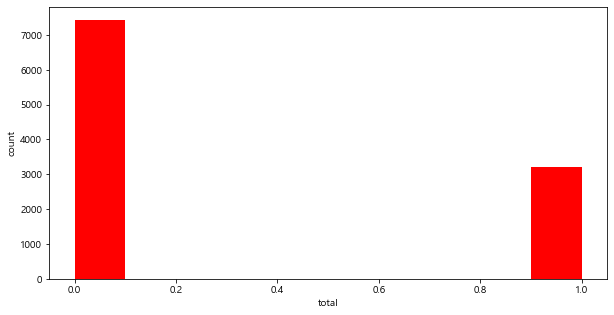

In [20]:
plt.figure(figsize=(10,5))
plt.hist(data['total'],color='red')
plt.xlabel('total')
plt.ylabel('count')

In [21]:
data.corr()['total'].sort_values().head(20)

A7B_3         -0.032198
D_TRA1_NUM    -0.013279
D_TRA1_SDAY   -0.012209
A7B_5         -0.005310
A5_19         -0.005102
A5_10         -0.004791
A5_13         -0.003569
D_TRA1_EDAY   -0.002764
A7B_7         -0.002171
A5_18         -0.002040
A7B_4         -0.001981
A5_16          0.000615
A5_14          0.001170
A7B_6          0.001170
A5_12          0.001784
A5_21          0.002581
A5_20          0.003098
A5_17          0.004159
A7B_2          0.005363
A7             0.019284
Name: total, dtype: float64

In [22]:
feature = []

연속형 변수
- 피어슨 상관 계수
연속형 변수 2개의 상관 관계를 확인하기 위한 가장 기본적인 방법이다.
정확히 말해서 두개의 수치값들의 집합이 있을 때 이 두개의 수치값들은 각각의 순서쌍에 대해서 연결관계가 있다고 할 때 두 수치값이 서로 관련이 있는지를 확인하는 방법이다.

흔한 예로 있는 것이 고등학생 한 학급에 50명이 있다고 할 때 이 학생들의 수학과목의 성적과 물리과목의 성정이 관련이 있는지 확인하는 것이 있다. 즉 수학과목과 물리과목은 서로 수리적 또는 과학적 능력과 관련이 있어 두 과목은 서로 관련이 있을 것이라는 가설을 어느 정도 두고 있으며 실제로 그런지 확인한다.

p-value가 0.05보다 클 경우 변수간의 상관관계가 존재하지 않음
https://intothedata.com/02.scholar_category/statistics/correlation/

https://bskyvision.com/754

In [23]:
from scipy import stats
for i in numeric:
    corr, pval = stats.pearsonr(data[i],data['total'])
    if pval <0.05:
        print(i,pval)
        feature.append(i)

D_TRA1_COST 9.474000129399422e-33
D_TRA1_ONE_COST 1.6933378081462536e-45
A7 0.046713725063188376


이진 변수
- 점 양분 상관 계수
한 변수는 있음/없음, 네/아니오 등으로 이분형(binary) 이고, 다른 한 변수는 연속형인 경우에도 상관계수를 구할 수 있습니다.

p-value가 0.05보다 클 경우 변수간의 상관관계가 존재하지 않음
https://mansoostat.tistory.com/115

In [24]:
from scipy.stats import pointbiserialr
for i in binary:
    corr, pval = pointbiserialr(data[i],data['total'])
    if pval <0.05:
        print(i,pval)
        feature.append(i)

A5_1 1.057237106327922e-11
A5_2 9.9742406536892e-13
A5_3 4.101765010210948e-06
A5_4 0.0017944288532242554
A5_5 1.7163740105565753e-09
A5_6 2.106229489038291e-06
A5_7 7.602318634340863e-05
A5_8 5.837559867238211e-11
A5_9 1.8738388466212786e-05
A5_11 0.00198598747834124
A5_15 2.724686219829359e-18
A7B_1 0.00010512246066139061
A7B_3 0.000895713806665898


명목형 변수 one-hot-encoding

In [25]:
nominal

obdata=pd.DataFrame()
for i in nominal:
    obdata[i]=data[i]
obdata = pd.get_dummies(obdata)

In [26]:
obdata

,D_TRA1_CHECK_Y,D_TRA1_CASE_1.0,A1_1_1,A1_1_10,A1_1_11,A1_1_2,A1_1_3,A1_1_4,A1_1_5,A1_1_6,...,SAGE_85,SAGE_86,SAGE_87,BEDU_1,BEDU_2,BEDU_3,BEDU_4,BFAM_1,BFAM_2,BFAM_3
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
21110610901_148196,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2231011065A_7203,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2302055001A_181404,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2305060097A_38902,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3901054306A_172336,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
39010631871_142345,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [27]:
obfeature=[]
for i in obdata.dtypes.index:
    corr, pval = pointbiserialr(obdata[i],data['total'])
    if pval <0.05:
        print(i,'   ',pval)
        obfeature.append(i)

A1_1_11     0.005664376009495872
A1_1_3     2.1125147114453504e-11
A1_1_5     0.0038860340972685483
A1_1_6     1.298282152845974e-10
A1_1_8     0.00020414757557059467
A4_1_1     0.0007141323400370314
A4_1_2     8.301942538970025e-06
A4_1_3     0.021652371952313614
A4_1_4     2.1136736791416454e-08
A4_1_6     0.0003743202792726745
BAGE_1     0.0071879782666163265
SAGE_19     0.0002839320716658538
SAGE_25     0.0013703546414453864
SAGE_27     0.04434011861781306
SAGE_34     0.014424770524347803
SAGE_41     0.034696279250214804
SAGE_54     0.03834620371683675
SAGE_68     0.019036358373836222
SAGE_73     0.04425789528095645


C:\Users\rhkdg\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [28]:
data["D_TRA1_1_SPOT"] = data["D_TRA1_1_SPOT"].apply(str)
local = data["D_TRA1_1_SPOT"]

local = pd.get_dummies(local)
location = []
for i in local.dtypes.index:
    location.append(i)

In [29]:
obdata

,D_TRA1_CHECK_Y,D_TRA1_CASE_1.0,A1_1_1,A1_1_10,A1_1_11,A1_1_2,A1_1_3,A1_1_4,A1_1_5,A1_1_6,...,SAGE_85,SAGE_86,SAGE_87,BEDU_1,BEDU_2,BEDU_3,BEDU_4,BFAM_1,BFAM_2,BFAM_3
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
21110610901_148196,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2231011065A_7203,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2302055001A_181404,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2305060097A_38902,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3901054306A_172336,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
39010631871_142345,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [30]:
X=pd.DataFrame()
for i in feature:
    X[i] = data[i]
    
for i in obfeature:
    X[i] = obdata[i]
for i in local:
    X[i] = local[i]
y = data['total']

C:\Users\rhkdg\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [31]:
X.index

Index(['11080760641_204453', '21110610901_148196', '2231011065A_7203',
       '2302055001A_181404', '2305060097A_38902', '2402069106A_324336',
       '25030560931_97381', '2504054317A_125174', '2504061032A_11754',
       '2504061032A_11785',
       ...
       '38360420481_344130', '38380360191_111885', '38390110071_141400',
       '3901052184A_142569', '3901052184A_56268', '3901053052A_112093',
       '3901054306A_172336', '39010631871_142345', '39020520031_345686',
       '3902057133A_260717'],
      dtype='object', name='ID', length=10638)

In [32]:
y

ID
11080760641_204453    0
21110610901_148196    0
2231011065A_7203      0
2302055001A_181404    0
2305060097A_38902     0
                     ..
3901053052A_112093    1
3901054306A_172336    1
39010631871_142345    1
39020520031_345686    1
3902057133A_260717    1
Name: total, Length: 10638, dtype: int64

In [33]:
X

,D_TRA1_COST,D_TRA1_ONE_COST,A7,A5_1,A5_2,A5_3,A5_4,A5_5,A5_6,A5_7,...,38330,38340,38350,38360,38370,38380,38390,38400,39010,39020
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,40000.0,40000.0,4,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21110610901_148196,90000.0,90000.0,7,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2231011065A_7203,90000.0,30000.0,3,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2302055001A_181404,21000.0,22000.0,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2305060097A_38902,40000.0,20000.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,150000.0,37500.0,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3901054306A_172336,30000.0,15000.0,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
39010631871_142345,20000.0,20000.0,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import StratifiedKFold

In [35]:
skf = StratifiedKFold(n_splits= 5 , shuffle= True, random_state=0)

In [36]:
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# import statsmodels.api as sm
# '''
# Statsmodels 패키지는 검정 및 추정(test and estimation), 회귀분석(regression analysis), 
# 시계열 분석(time - series analysis) 등의 기능을 제공하는 파이썬 패키지이다.
# '''

# log_reg = LogisticRegression()

# log_reg.fit(X, y)
# x2 = sm.add_constant(X)
# model = sm.OLS(y, x2)
# result = model.fit()
# print(result.summary())

# print(f'score : {cross_val_score(log_reg, X, y, cv=skf).mean()}')

In [37]:
# log_reg.predict(X)

In [38]:
# log_reg.predict_proba(X.head())

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np


# 훈련/테스트 세트로 나누기

forest = RandomForestClassifier(n_estimators=50,                          
                                max_features = 1,
                                max_depth = 20,
                                random_state = 0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))
print(f'score : {cross_val_score(forest, X, y, cv=skf).mean()}')

훈련 세트 정확도 : 0.697
테스트 세트 정확도 : 0.706
score : 0.6985335516550524


In [41]:
forest.predict_proba(X)

array([[0.72519114, 0.27480886],
       [0.74105345, 0.25894655],
       [0.74781938, 0.25218062],
       ...,
       [0.68993692, 0.31006308],
       [0.67504173, 0.32495827],
       [0.6828497 , 0.3171503 ]])

In [42]:
import joblib
joblib.dump(forest, './forest.pkl')

['./forest.pkl']

In [43]:
data['D_TRA1_1_SPOT']

ID
11080760641_204453    31170
21110610901_148196    38090
2231011065A_7203      37310
2302055001A_181404    31010
2305060097A_38902     11010
                      ...  
3901053052A_112093    39020
3901054306A_172336    39020
39010631871_142345    39020
39020520031_345686    39010
3902057133A_260717    39010
Name: D_TRA1_1_SPOT, Length: 10638, dtype: object

In [44]:
a=sorted(data['D_TRA1_1_SPOT'].values[:])

In [45]:
# n = 1
# for i in X:
#     try:
#         print(str(int(float(i)))+',')
#     except:
#         pass
#     n+=1

In [46]:
#36~259 지역번호
259-36
citys = [11010,
11020,
11030,
11040,
11050,
11060,
11080,
11090,
11100,
11110,
11120,
11130,
11140,
11150,
11160,
11170,
11180,
11190,
11210,
11220,
11230,
11240,
11250,
21010,
21020,
21030,
21040,
21050,
21060,
21070,
21080,
21090,
21100,
21110,
21120,
21130,
21140,
21310,
22010,
22020,
22040,
22050,
22060,
22070,
22310,
23010,
23020,
23030,
23040,
23050,
23060,
23070,
23080,
23310,
23320,
24010,
24020,
24030,
24040,
24050,
25010,
25020,
25030,
25040,
25050,
26010,
26020,
26030,
26040,
26310,
29010,
31010,
31020,
31030,
31040,
31050,
31060,
31070,
31080,
31090,
31100,
31110,
31120,
31130,
31140,
31150,
31160,
31170,
31180,
31190,
31200,
31210,
31220,
31230,
31240,
31250,
31260,
31270,
31280,
31350,
31370,
31380,
32010,
32020,
32030,
32040,
32050,
32060,
32070,
32310,
32320,
32330,
32340,
32350,
32360,
32370,
32390,
32400,
32410,
33020,
33030,
33040,
33320,
33330,
33340,
33350,
33360,
33370,
33380,
33390,
34010,
34020,
34030,
34040,
34050,
34060,
34070,
34080,
34310,
34330,
34340,
34350,
34360,
34370,
34380,
35010,
35020,
35030,
35040,
35050,
35060,
35310,
35320,
35330,
35340,
35350,
35360,
35370,
35380,
36010,
36020,
36030,
36040,
36060,
36310,
36320,
36330,
36350,
36360,
36370,
36380,
36390,
36400,
36410,
36420,
36430,
36440,
36450,
36460,
36470,
36480,
37010,
37020,
37030,
37040,
37050,
37060,
37070,
37080,
37090,
37100,
37310,
37320,
37330,
37340,
37350,
37360,
37370,
37380,
37390,
37400,
37410,
37420,
37430,
38030,
38050,
38060,
38070,
38080,
38090,
38100,
38110,
38310,
38320,
38330,
38340,
38350,
38360,
38370,
38380,
38390,
38400,
39010,
39020,]

In [47]:
cost= 4000000
n = 10
sample = [cost, cost//n, n, 1, 1, 1, 1, 1, 1,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0]
city = [0]*224
r = []
for i in range(224):
    city[i] = 1
    temp = forest.predict_proba(pd.DataFrame(sample+city).T)[0][1]
    r.append([citys[i],temp])
    city[i] = 0

In [48]:
r.sort(key = lambda x : x[1])
len(r)/10

22.4

In [50]:
r

[[11080, 0.3382866230505004],
 [23040, 0.34270544759051463],
 [31040, 0.34381425896594975],
 [11190, 0.34412050256088483],
 [36060, 0.349231269188269],
 [37060, 0.35597614751153556],
 [31110, 0.35820379096473814],
 [11240, 0.3586241088395571],
 [31230, 0.36016616967750004],
 [32310, 0.36110277855553663],
 [33390, 0.36125869507905767],
 [31380, 0.36274912633112616],
 [35050, 0.36278602823849526],
 [37370, 0.3630507685430488],
 [22060, 0.36610154947485013],
 [31160, 0.3668899384141167],
 [36310, 0.3674169156888621],
 [37390, 0.36751498613584277],
 [11010, 0.3675919094528976],
 [31370, 0.3676036180284765],
 [21100, 0.3679824638156744],
 [34340, 0.3679824638156744],
 [32350, 0.368719804194123],
 [22020, 0.36876760201675224],
 [32320, 0.3689358896503152],
 [23070, 0.3690182934069069],
 [11230, 0.3691512506868813],
 [35360, 0.3692571769796129],
 [31100, 0.3695045757350373],
 [33030, 0.36983788187382904],
 [31260, 0.37001582203379746],
 [38380, 0.37019605128485317],
 [38330, 0.370550208217031

In [49]:
from collections import Counter

result = Counter(r)
print(result)

for key in result:
    print(key, result[key])

# 값만 출력도 가능
result = Counter(r).values()
print(result)


TypeError: unhashable type: 'list'